In [ ]:
################### PLOTTING A HISTOGRAM (USED SEABORN!)
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
# Set default Seaborn style
sns.set()
# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
# Show histogram
plt.show()



################### ADDING AXIS LABELS
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)
# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()


################# ADJUSTING THE NUMBER OF BINS IN HISTOGRAM
# Import numpy
import numpy as np
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)
# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
# Plot the histogram
plt.hist(versicolor_petal_length,bins=n_bins)
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
# Show histogram
plt.show()




################# MAKING A BEE SWARM PLOT
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species',y='petal length (cm)',data=df)
# Label the axes
plt.xlabel('species')
plt.ylabel('width')
# Show the plot
plt.show()

"""can also be """

# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x=df['species'],y=df['petal length (cm)'])
# Label the axes
plt.xlabel('species')
plt.ylabel('width')
# Show the plot
plt.show()


################# PLOTTING ECDF (NOTE NP>ARRANGE())
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

    ##plotting it
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)
# Generate plot
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')
# Label the axes
_=plt.xlabel('Petal length')
_=plt.ylabel('ECDF')
# Display the plot
plt.show()
    
    ##plotting all 3 in a single graph of ECDF
# Compute ECDFs
x_set,y_set = ecdf(setosa_petal_length)
x_vers,y_vers = ecdf(versicolor_petal_length)
x_virg,y_virg = ecdf(virginica_petal_length)
# Plot all ECDFs on the same plot
_ = plt.plot(x_set,y_set,marker='.',linestyle='none')
_ = plt.plot(x_vers,y_vers,marker='.',linestyle='none')
_ = plt.plot(x_virg,y_virg,marker='.',linestyle='none')
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
# Display the plot
plt.show()





###########################################################################################################################
###################################################PART 2##################################################################
###########################################################################################################################
################ CALCULATING PERCENTILES
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])
# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)
# Print the result
print(ptiles_vers)



############### PLOTTING PERCENTILE AND ECDF ON SAME PLOT
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')
# Show the plot
plt.show()




################BOX-AND-WHISKER PLOT
# Create box plot with Seaborn's default settings
_=sns.boxplot(y='petal length (cm)', x='species', data=df)
# Label the axes
_=plt.xlabel('species')
_=plt.ylabel('petal length (cm)')
# Show the plot
plt.show()



################# SCATTER PLOT WITHOUT NORMALIZING DATA
# Make a scatter plot
_=plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')
# Label the axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Show the result
plt.show()



################## GETTING THE COVARIANCE FROM COVARIANCE MATRIX
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)
# Print covariance matrix
print(covariance_matrix)
# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[1,0]
# Print the length/width covariance
print(petal_cov)


################## CALCULATE PEARSON_r COEFFICIENT
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]
# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length,versicolor_petal_width)
# Print the result
print(r)




###########################################################################################################################
###################################################PART 3##################################################################
###########################################################################################################################
################## GENERATING A HISTOGRAM OF RANDOM NUMBERS
# Seed the random number generator
np.random.seed(42)
# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)
# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()
# Plot a histogram
_ = plt.hist(random_numbers)
# Show the plot
plt.show()



#################BERNOULLI TRIALS
def perform_bernoulli_trials(n, p):              #This one is same as np.random.binomial()
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0
    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success



################# PLOTTING HISTOGRAM FOR PROBABILITY
# Seed random number generator
np.random.seed(2)
# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)
# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)
# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
# Show the plot
plt.show()




############### WILL THE BANK FAIL? (ECDF AND SIMULATION)
# Compute ECDF: x, y
x,y = ecdf(n_defaults)
# Plot the ECDF with labeled axes
_=plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('defaults')
plt.ylabel('percentage')
# Show the plot
plt.show()
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))





################ SAMPLING A RANDOM BINOMIAL DISTRIBUTION
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)
# Compute CDF: x, y
x,y = ecdf(n_defaults)
# Plot the CDF with axis labels
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Defaults')
_=plt.ylabel('CDF')
# Show the plot
plt.show()



################ PLOTTING A BINOMIAL PMF
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
# Generate histogram
_=plt.hist(n_defaults,bins=bins,normed=True)
# Label axes
_=plt.xlabel('Value')
_=plt.ylabel('Prob')
# Show the plot
plt.show()

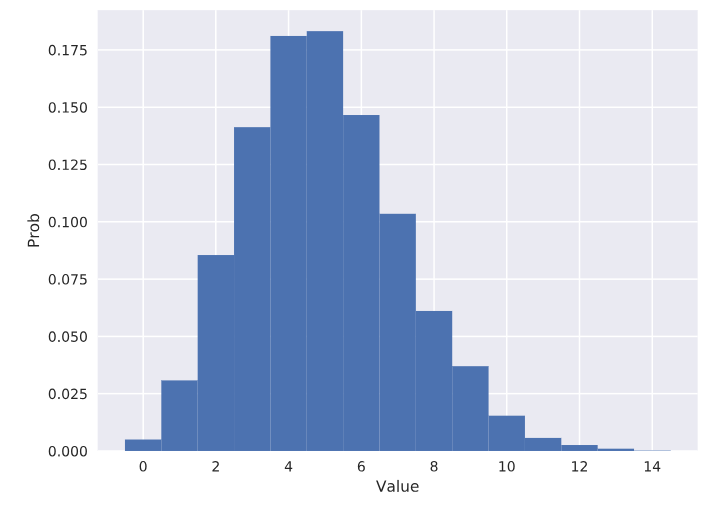

In [9]:
from IPython.display import Image
Image('thinkstatch3.PNG')

In [ ]:
################# RELATIONSHIP BETWEEN BINOMIAL AND POISSON DISTRIBUTIONS
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,10000)
# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))
# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)
    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))
    
    

    
    
################### WAS 2015 ANOMALOUS ? A POISSON DISTRIBUTION PROBABILITY CHECK
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)
# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)
# Compute probability of getting seven or more: p_large
p_large = n_large/10000
# Print the result
print('Probability of seven or more no-hitters:', p_large)









###########################################################################################################################
###################################################PART 4##################################################################
###########################################################################################################################


#################### DRAWING THE NORMAL PDF
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,100000)
samples_std3 = np.random.normal(20,3,100000)
samples_std10 = np.random.normal(20,10,100000)
# Make histograms
_ = plt.hist(samples_std1, normed=True, histtype='step', bins=100)
_ = plt.hist(samples_std3, normed=True, histtype='step', bins=100)
_ = plt.hist(samples_std10, normed=True, histtype='step', bins=100)
# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()




################### PLOTTING THE NORMAL CDF
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)
# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')
# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()





################# BELMONT STAKES - NORMAL DISTRIBUTION OR NOT
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)
# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)
# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()




################# CHANCES OF BEATING A SCORE FROM NORMAL DISTRIBUTION OF ALL SCORES
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)
# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)
# Print the result
print('Probability of besting Secretariat:', prob)




################ WAITING TIME TOTAL FOR 2 EXPONENTIAL EVENTS
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)
    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)
    return t1 + t2




################ WAITING TIME (NO OF GAMES) FOR 2 SUCCESSIVE POISSON EVENTS
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)
# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',normed=True)
# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')
# Show the plot
plt.show()





###############  